iter: 0 cost: 4.226079345115714
iter: 10 cost: 2.4112032401322487
iter: 20 cost: 0.9323756286139465
iter: 30 cost: 0.3964106966007865
iter: 40 cost: 0.24351379932390063
iter: 50 cost: 0.184053911306893
iter: 60 cost: 0.14882939790084082
iter: 70 cost: 0.12155694698309678
iter: 80 cost: 0.09850812060770955
iter: 90 cost: 0.07872520756972082

ACCURACY=
0.4044943820224719


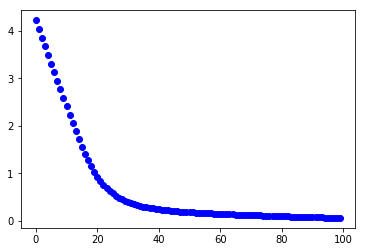

In [345]:
import numpy as np
import pandas as pd
import csv 
import matplotlib.pyplot as plt

lr=0.05
weights=np.ones(9)
iters=100
test=pd.read_csv('/home/ananya/Downloads/test.csv')
train= pd.read_csv('/home/ananya/Downloads/train.csv')

#    CLEANING DATA


#  impute average age values to null age values:

def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

train.drop("Cabin",inplace=True,axis=1)
train.dropna(inplace=True)


pd.get_dummies(train["Sex"])
sex = pd.get_dummies(train["Sex"],drop_first=True)


embarked = pd.get_dummies(train["Embarked"],drop_first=True)
pclass = pd.get_dummies(train["Pclass"],drop_first=True)


train = pd.concat([train,pclass,sex,embarked],axis=1)


train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

#creating Fare bands
train['FareBand'] = pd.qcut(train.Fare,7,labels=False)
train['AgeBands'] = pd.qcut(train.Age,4,labels=False)

#Dropping the Age and Fare columns
train.drop(['Age','Fare'],axis=1,inplace=True)

#X contains all features and y contaons all targets

features = train.drop("Survived",axis=1)
labels = train["Survived"]

# COST FUNCTION
def cost_function(features, labels, weights):
   
   # Using Mean Absolute Error

   # Features:(889,9)
   # Labels: (889,1)
   # Weights:(9,1)
   # Returns 1D matrix of predictions
   # Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost + class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost
#UPDATE WEIGHTS
def update_weights(features, labels, weights, lr):
    
   # Vectorized Gradient Descent

    #Features:(889, 9)
    #Labels: (889, 1)
   # Weights:(9, 1)
    
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (889,9) to (9,889)
    # So we can multiply w the (889,1)  cost matrix.
    # Returns a (9,1) matrix holding 9 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights
# PREDICT FUNCTION
def predict(features, weights):
  
 # Returns 1D array of probabilities
 # that the class label == 1
  
    z = np.dot(features, weights)
    return sigmoid(z)
#SIGMOID FUNCTION

def sigmoid(z):
     return 1 / (1 + np.exp(-z))
    
    #assigning class labels (0 or 1) to our predicted probabilities.

#Decision boundary

def decision_boundary(prob):
   
    np.any(prob >= 0.5)
    return 1.0
    np.any(prob<0.5)
    return 0.0

#CLASSIFY
def classify(predictions):
 
 # input  - N element array of predictions between 0 and 1
 # output - N element array of 0s (False) and 1s (True)
  
    
    return decision_boundary(predictions)

#ACCURACY

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

# TRAINING MODEL


cost_history = []

for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = - cost_function(features, labels, weights)
        cost_history.append(cost)
        plt.plot(i,cost,marker='o',color='blue')
       # Log Progress
        if i % 10== 0:
            print ("iter: "+str(i) + " cost: "+str(cost))
predictions=predict(features,weights)
predicted_labels=classify(predictions)

acc=accuracy(predicted_labels,labels)
print("\nACCURACY=")
print(acc)
